In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install ultralytics

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
%cd /content/drive/MyDrive/Colab_Notebooks

/content/drive/MyDrive/Colab_Notebooks


In [5]:
!ls

 data					    MutliClassification		       runs
 data.yaml				   'Object Detection'		       Untitled0.ipynb
'Image Classification Architecture.ipynb'   Object_Detection_RoadSigns.ipynb   yolov8n.pt


In [6]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


## Displaying Sample Images

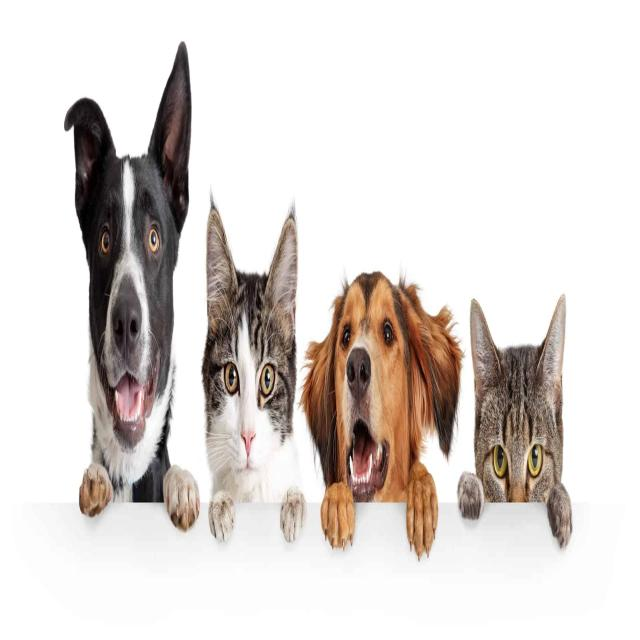

In [59]:
Image(filename = '/content/drive/MyDrive/Colab_Notebooks/data/train/images/12_jpeg.rf.caec944ee035f12f628a831b454e136b.jpg', width = 200)

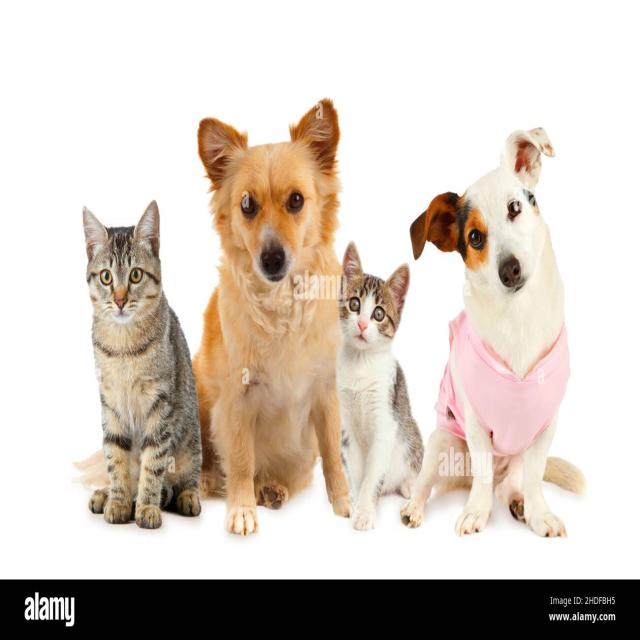

In [60]:
Image(filename = '/content/drive/MyDrive/Colab_Notebooks/data/train/images/6_jpg.rf.e3472900e34545596e22173b401faf63.jpg', width = 200)

## Training Yolov8 Model

In [44]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/drive/MyDrive/Colab_Notebooks/data/data.yaml epochs= 20 imgsz=224

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab_Notebooks/data/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

In [45]:
!ls /content/drive/MyDrive/Colab_Notebooks/runs/detect/train3

args.yaml					     P_curve.png	train_batch11.jpg
confusion_matrix_normalized.png			     PR_curve.png	train_batch12.jpg
confusion_matrix.png				     R_curve.png	train_batch1.jpg
events.out.tfevents.1708925503.ce91155e9a3c.20180.0  results.csv	train_batch2.jpg
F1_curve.png					     results.png	val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					     train_batch10.jpg	weights


In [46]:
from IPython.display import Image

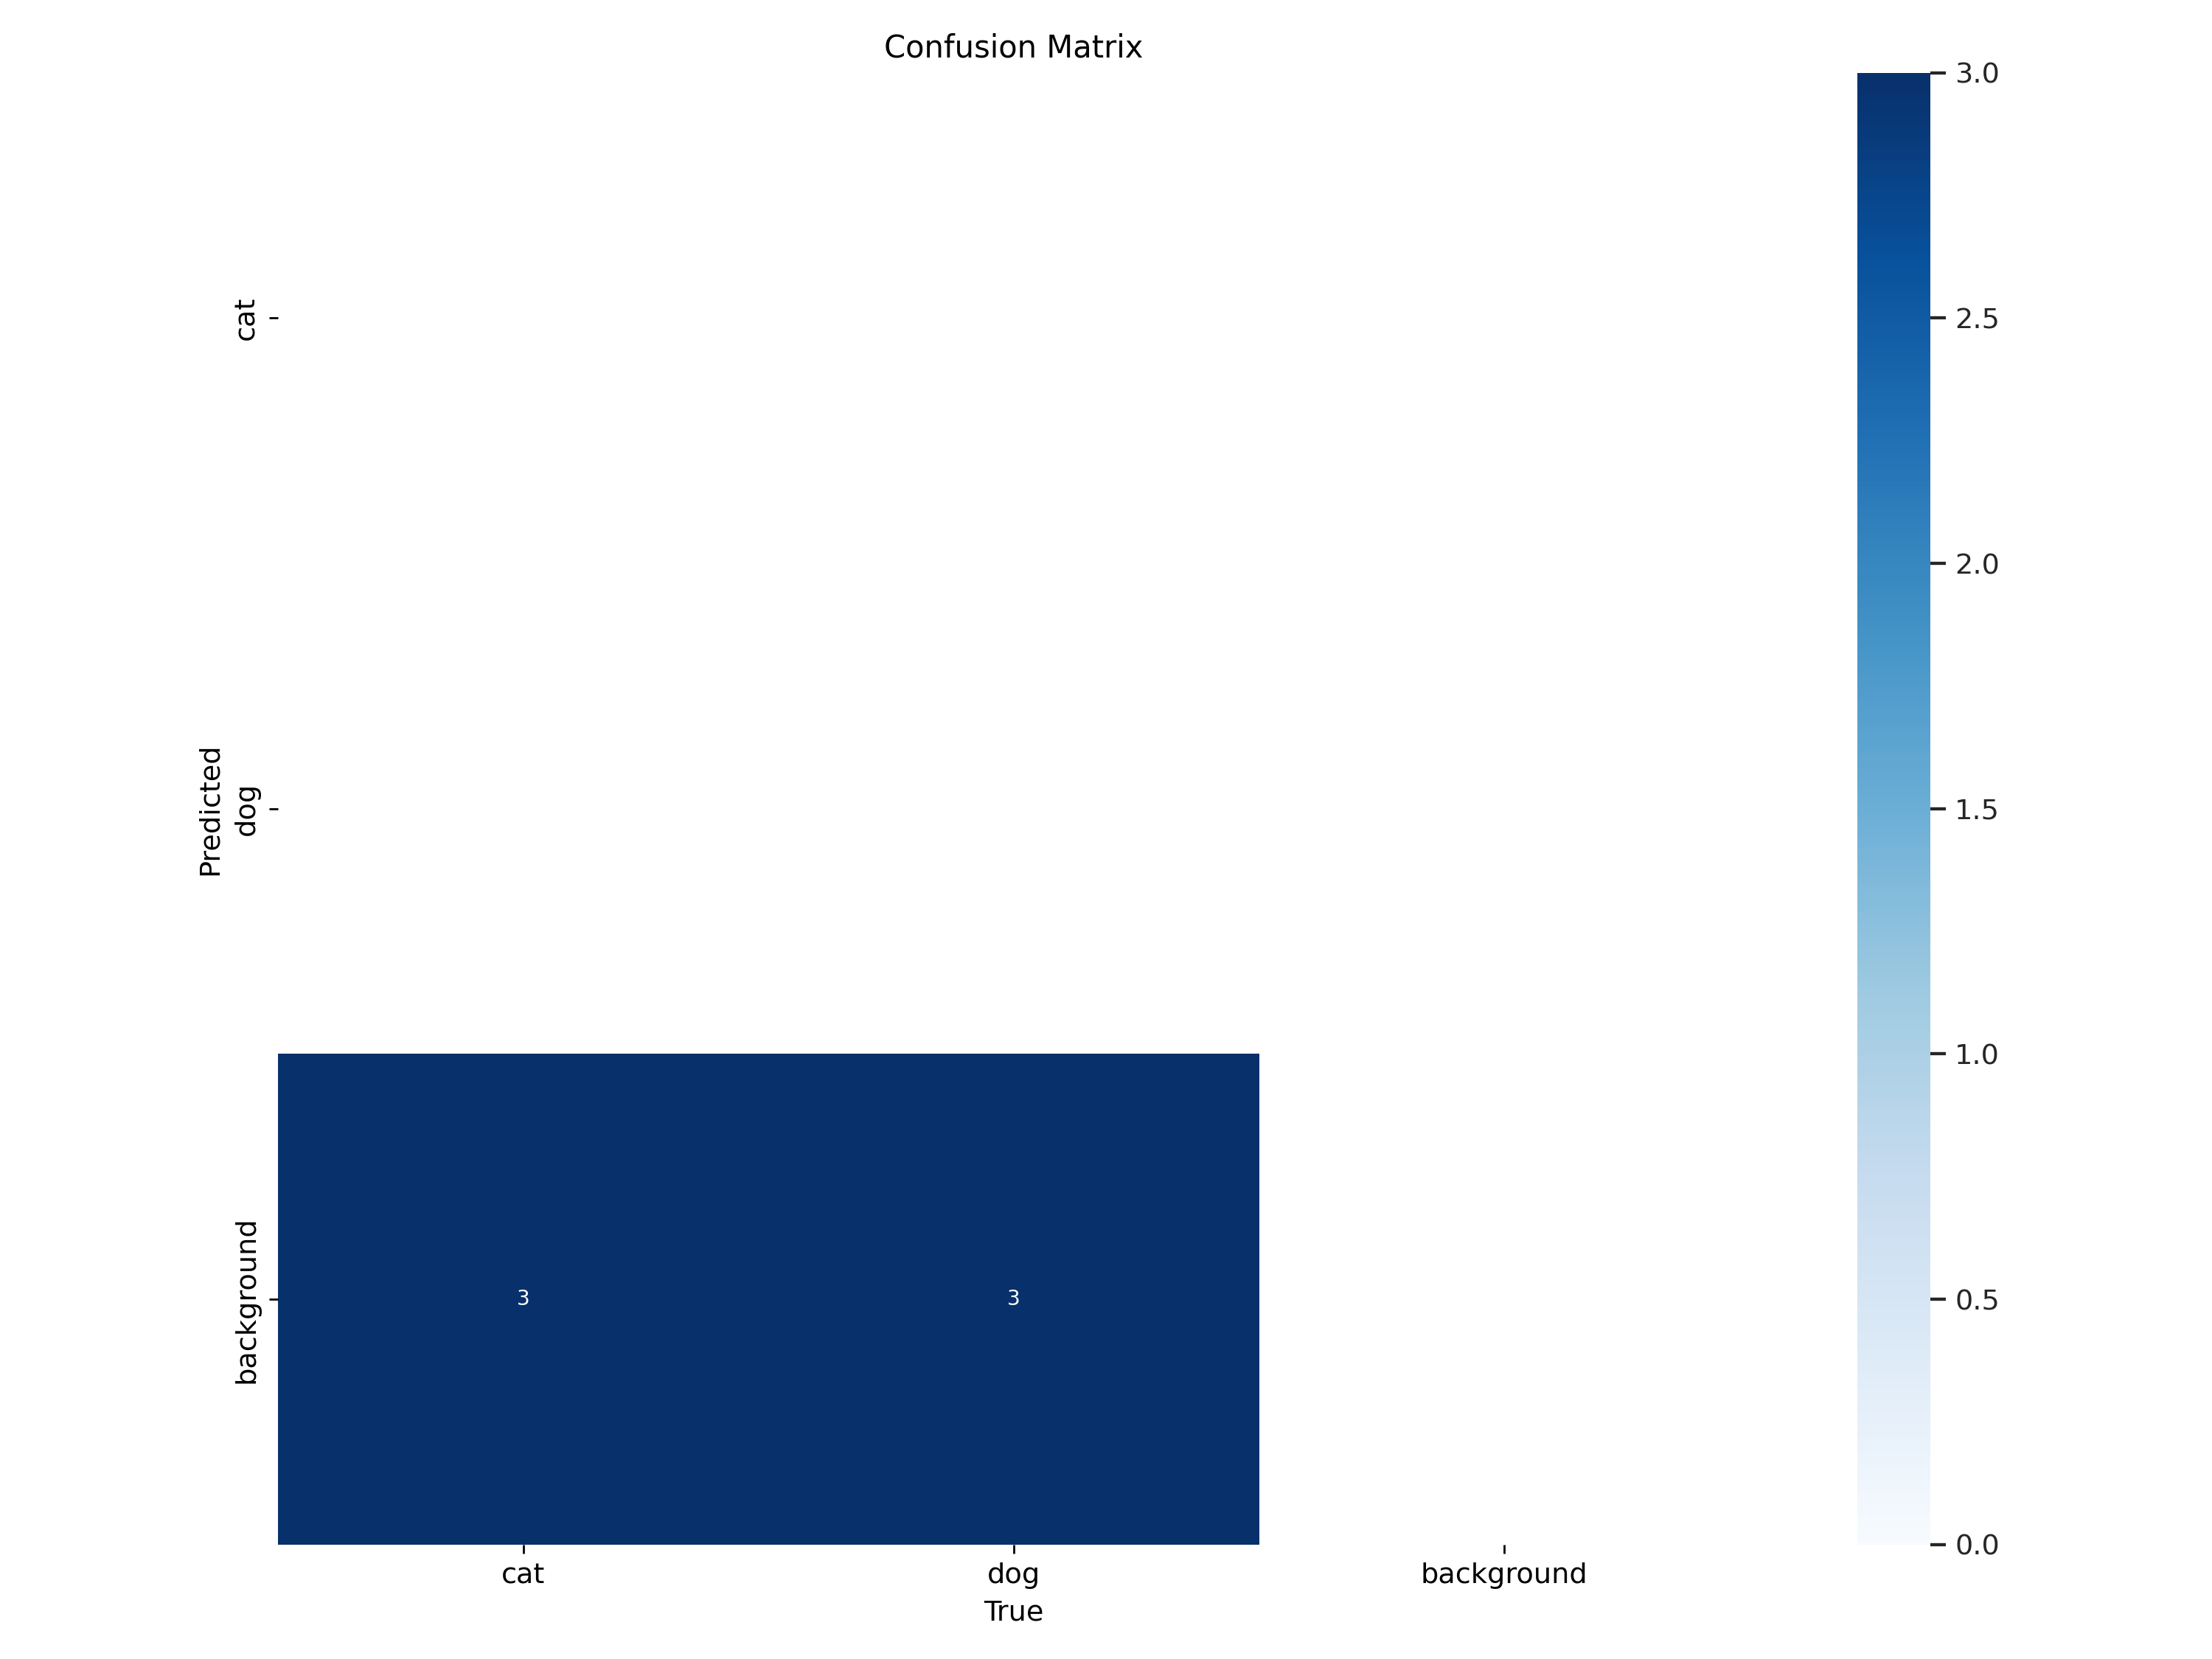

In [47]:
Image(filename = '/content/drive/MyDrive/Colab_Notebooks/runs/detect/train3/confusion_matrix.png', width = 400)

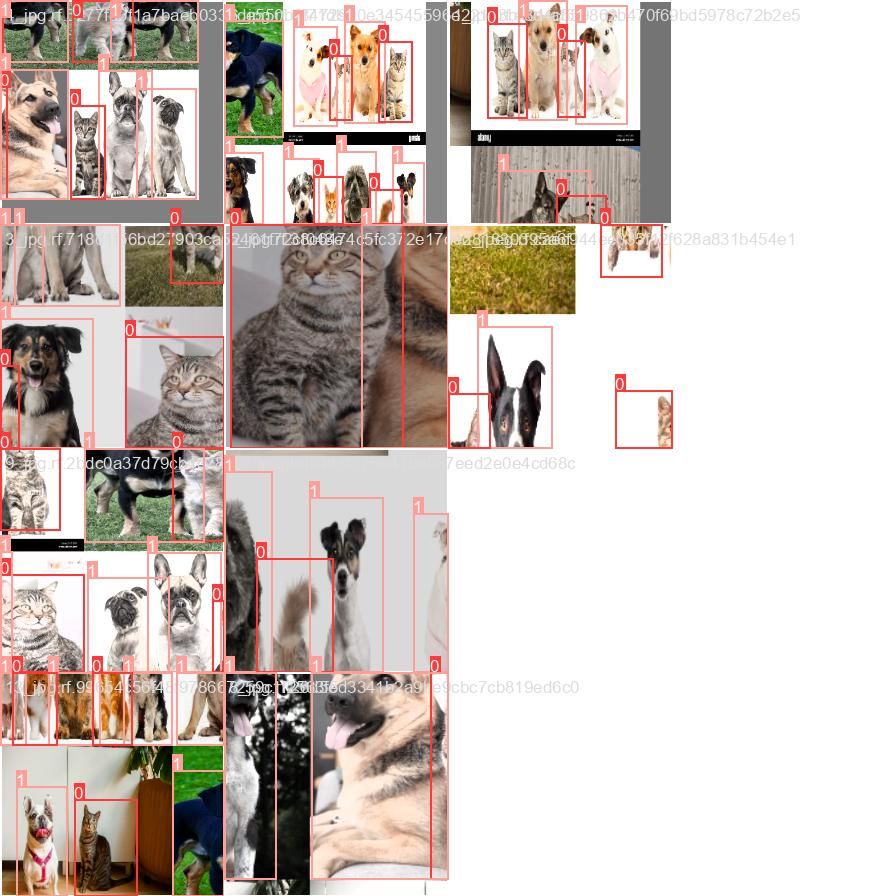

In [57]:
Image(filename = '/content/drive/MyDrive/Colab_Notebooks/runs/detect/train3/train_batch2.jpg', width = 400)

## Validating Model

In [49]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Colab_Notebooks/runs/detect/train3/weights/best.pt data=/content/drive/MyDrive/Colab_Notebooks/data/data.yaml

Ultralytics YOLOv8.1.18 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Colab_Notebooks/data/valid/labels.cache... 3 images, 0 backgrounds, 0 corrupt: 100% 3/3 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.88it/s]
                   all          3          6    0.00817          1      0.587      0.344
                   cat          3          3    0.00824          1      0.592       0.47
                   dog          3          3    0.00811          1      0.582      0.217
Speed: 2.9ms preprocess, 77.7ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


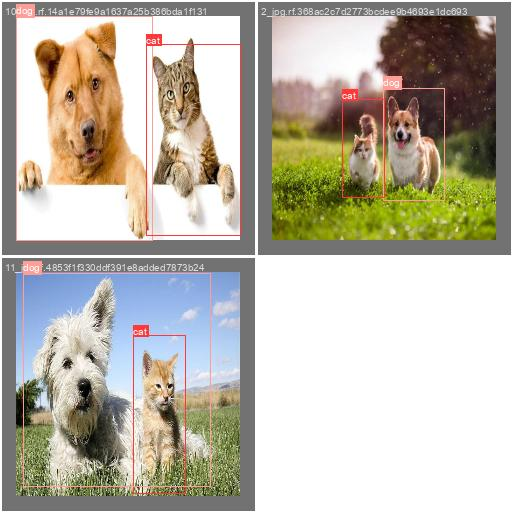

In [52]:
Image(filename = '/content/drive/MyDrive/Colab_Notebooks/runs/detect/val2/val_batch0_labels.jpg', width = 400)